# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

as well as an

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:

import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd




## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:

sat_data2017 = pd.read_csv('data/sat_2017.csv')
act_data2017 = pd.read_csv('data/act_2017.csv')

# read Pandas to see how to import .csv files ()

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
print(sat_data2017.head(10))
print(act_data2017.head(10))

                  State Participation  Evidence-Based Reading and Writing  \
0               Alabama            5%                                 593   
1                Alaska           38%                                 547   
2               Arizona           30%                                 563   
3              Arkansas            3%                                 614   
4            California           53%                                 531   
5              Colorado           11%                                 606   
6           Connecticut          100%                                 530   
7              Delaware          100%                                 503   
8  District of Columbia          100%                                 482   
9               Florida           83%                                 520   

   Math  Total  
0   572   1165  
1   533   1080  
2   553   1116  
3   594   1208  
4   524   1055  
5   595   1201  
6   512   1041  
7   492    996  

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

In [4]:
#Answer: data set includes 51 rows & 5 columns
#    row 1; column 1-5: Column Header 
#    column 1: US States + D.C. 
#    column 2: Participation 
#    column 3: Evidence-Based Reading and Writing Score 
#    column 4: Math Score - (possible error in low score of 52)
#    column 5: Total Score 
        

%matplotlib inline
sns.set_style('darkgrid')
sns.set(font_scale=1.5)

# Read dataset
sat_17 = pd.read_csv('data/sat_2017.csv')


sat_17.describe()



,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [5]:
#Answer: data set includes 52 rows & 7 columns
#    row 1; column 1-7: Column Header 
#    column 1: US States + D.C. + National 
#    column 2: Participation 
#    column 3: English Score 
#    column 4: Math Score 
#    column 5: Reading Score 
#    column 6: Science Score - possible error in low score
#    column 5: Composite Score - possible error in score with x

%matplotlib inline
sns.set_style('darkgrid')
sns.set(font_scale=1.5)

# Read dataset
act_17 = pd.read_csv('data/act_2017.csv')


act_17.describe()


,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


#### 4a. Does the data look complete? 

Answer: Yes except for some errors mentioned above.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: Yes there appear to be three obvious errors. 
1.  sat_2017.csv file: Math score of 52 for Maryland appears wrong and does not add to the total.  
    A possible correction would be to use the total less the writing score 
    to deduce the correct score should be 524
2.  act_2017.csv file: Science score of 2.3 for Maryland appears wrong and does not calc to the composite.
    A possible correction would be to use the composite and three other scores 
    to deduce the correct score should be 23.8
3.  act_2017.csv file: Composite score of 20.2x for Wyoming appears wrong 
    due to an erroneous x which can be removed 

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

### >>>sat_2017 Corrections

In [6]:
sat_17

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [7]:
#code
sat_17[sat_17['State']=='Maryland']

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [8]:
sat_17.loc[20 , 'Math'] = 524

In [9]:
sat_17[sat_17['State']=='Maryland']

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,524,1060


### >>>act_2017 Corrections:

In [10]:
act_17

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [11]:
act_17[act_17['State']=='Maryland']

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [12]:
act_17.loc[21 , 'Science'] = 23.2 # re-sourced

In [13]:
act_17[act_17['State']=='Maryland']

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,23.2,23.6


In [14]:
act_17[act_17['State']=='Wyoming']

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2x


In [15]:
act_17.loc[51 , 'Composite'] = 20.2

In [16]:
act_17[act_17['State']=='Wyoming']

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2


In [17]:
act_17

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 5. What are your data types? 
Display the data types of each feature. 

In [18]:
sat_17.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [19]:
act_17.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: Yes there are two problems:
    1. sat_17 & act_17: Participation is an object, which need to be changed to float
    2. act_17: Composite is an object (even after correcting Wyoming), which needs to be changed to float

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

### >>>remove % signs from Participation rate in both sat_17 & act_17 then convert to float.

In [20]:
#Remove all non-numerical characters except for '.'
sat_17['Participation'] = sat_17['Participation'].str.extract('(\d+)', expand=False)
#Change 'Participation' to float, since it is a % figure.
sat_17.Participation = sat_17.Participation.astype('float64')

#Remove all non-numerical characters except for '.'
act_17['Participation'] = act_17['Participation'].str.extract('(\d+)', expand=False)
#Change 'Participation' to float, since it is a % figure.
act_17.Participation = act_17.Participation.astype('float64')


- Fix any individual values preventing other columns from being the appropriate type.

In [21]:
#code (how to re-write this code using 'individual values')

# act_17 remove x from Composite : Wyoming
# then convert to float

#Remove all non-numerical characters except for '.'
act_17['Composite'] = act_17['Composite'].str.extract('(\d+)', expand=False)
#Change 'Composite' to float, after removing x.
act_17.Composite = act_17.Composite.astype('float64')

#using masks to check for string or float is drug["meth-use"]
# or ask = df.some_column.aply(lambda x: isinstance(x, str))
#       df = df[~mask] # ~ reverses logic of search

- Finish your data modifications by making sure the columns are now typed appropriately.

In [22]:
#code
sat_17.dtypes


State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [23]:
act_17.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

- Display the data types again to confirm they are correct.

In [24]:
#Code: see above

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [25]:
#code
# change the header names to: 
    # sat_17_state; sat_17_part; sat_17_write; sat_17_math; sat_17_total 

sat_17.rename(columns = {'State':'sat_17_state', 'Participation' : 'sat_17_part', 'Evidence-Based Reading and Writing':'sat_17_write', 'Math' : 'sat_17_math', 'Total' : 'sat_17_total'}, inplace = True)
sat_17.head()



,sat_17_state,sat_17_part,sat_17_write,sat_17_math,sat_17_total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [26]:
#code
# change the header names to: 
    # act_17_state; act_17_part; act_17_english; act_17_math; act_17_read; act_17_sci; act_17_comp 

act_17.rename(columns = {'State':'act_17_state', 'Participation' : 'act_17_part', 'English' : 'act_17_english', 'Math' : 'act_17_math', 'Reading' : 'act_17_read', 'Science' : 'act_17_sci', 'Composite' : 'act_17_comp'}, inplace = True)
act_17.head()


,act_17_state,act_17_part,act_17_english,act_17_math,act_17_read,act_17_sci,act_17_comp
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.0
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.0
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.0
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.0


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Column Name|Type|Dataset Source|Description|
|---|---|---|---|
|sat_17_state|str|SAT 2017.csv|List of 50 US States + District of Columbia.|
|sat_17_part|float|SAT 2017.csv|Participation rate for each State 
|sat_17_write|int|SAT 2017.csv|Test score for Evidence-Based Reading and Writing section of exam
|sat_17_math|int|SAT 2017.csv|Test score for Math section of exam
|sat_17_total|int|SAT 2017.csv|Test score for total (Evidence-Based Reading and Writing + Math)
|
|---|---|---|---|
|changes from raw data: |type|Adjusted Dataset|Description
|change header|str|sat_17|'State':'sat_17_state', 'Participation' : 'sat_17_part', 
| > | > | > |'Evidence-Based Reading and Writing':'sat_17_write', 
| > | > | > |'Math' : 'sat_17_math', 'Total' : 'sat_17_total'
|Maryland Math score error|int|sat_17|Math score of 52 for Maryland corrected 524.
|sat_17_part|str to float|sat_17|remove % signs then convert to float.



|Column Name|Type|Dataset Source|Description|
|---|---|---|---|
|act_17_state|string|ACT 2017|List of 50 US States + District of Columbia + National Average|
|act_17_part|float|ACT 2017|Participation rate for each State
|act_17_english|float|ACT 2017|Test score for English section of exam
|act_17_math|float|ACT 2017|Test score for Math section of exam
|act_17_read|float|ACT 2017|Test score for Read section of exam
|act_17_science|float|ACT 2017|Test score for Science  section of exam
|act_17_composite|float|ACT 2017|Composite average total Test score
|
|---|---|---|---|
|changes from raw data: |type|Adjusted Dataset|Description
|change header|str|act_17|'State':'act_17_state', 'Participation' : 'act_17_part', 'English' : 'act_17_english', 
| > | > | > |'Math' : 'act_17_math', 'Reading' : 'act_17_read', 
| > | > | > |'Science' : 'act_17_sci', 'Composite' : 'act_17_comp' 
|Maryland Science score error|float|Resourced and corrected to 23.2 from 2.3|
|Wyoming Composite score error|object to float|Resourced and corrected to 20.2X from 20.2, and changed to float|
|act_17_part|str to float|act_17|remove % signs then convert to float.



#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [27]:
#code (assuming that we can remove National average from act_17)

#act_17.drop("National", axis=0)
act_17.drop([0], axis=0, inplace=True)
act_17.head()


,act_17_state,act_17_part,act_17_english,act_17_math,act_17_read,act_17_sci,act_17_comp
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.0
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.0
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.0
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.0
5,California,31.0,22.5,22.7,23.1,22.2,22.0


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [28]:
# harmonise column headers: sat_17_state & act_17_state into 17_state
sat_17.rename(columns = {'sat_17_state':'17_state'}, inplace = True)
sat_17.head()

,17_state,sat_17_part,sat_17_write,sat_17_math,sat_17_total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [29]:
# harmonise column headers: sat_17_state & act_17_state into 17_state
act_17.rename(columns = {'act_17_state':'17_state'}, inplace = True)
act_17.head()

,17_state,act_17_part,act_17_english,act_17_math,act_17_read,act_17_sci,act_17_comp
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.0
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.0
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.0
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.0
5,California,31.0,22.5,22.7,23.1,22.2,22.0


In [30]:
act_17.tail()

#problem with Wyoming, corrected again below

,17_state,act_17_part,act_17_english,act_17_math,act_17_read,act_17_sci,act_17_comp
47,Virginia,29.0,23.5,23.3,24.6,23.5,23.0
48,Washington,29.0,20.9,21.9,22.1,22.0,21.0
49,West Virginia,69.0,20.0,19.4,21.2,20.5,20.0
50,Wisconsin,100.0,19.7,20.4,20.6,20.9,20.0
51,Wyoming,100.0,19.4,19.8,20.8,20.6,NaN


In [31]:
# correct the Wyoming data again...

act_17.loc[51 , 'act_17_comp'] = 20.2

act_17.tail()


,17_state,act_17_part,act_17_english,act_17_math,act_17_read,act_17_sci,act_17_comp
47,Virginia,29.0,23.5,23.3,24.6,23.5,23.0
48,Washington,29.0,20.9,21.9,22.1,22.0,21.0
49,West Virginia,69.0,20.0,19.4,21.2,20.5,20.0
50,Wisconsin,100.0,19.7,20.4,20.6,20.9,20.0
51,Wyoming,100.0,19.4,19.8,20.8,20.6,20.2


In [32]:
#Code:


# merge sat_17 & act_17 on column 17_state
combine_17 = pd.merge(sat_17, act_17, how='outer', on='17_state')
combine_17.head()

,17_state,sat_17_part,sat_17_write,sat_17_math,sat_17_total,act_17_part,act_17_english,act_17_math,act_17_read,act_17_sci,act_17_comp
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.0
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.0
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.0
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.0
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.0


In [33]:
combine_17.tail()

,17_state,sat_17_part,sat_17_write,sat_17_math,sat_17_total,act_17_part,act_17_english,act_17_math,act_17_read,act_17_sci,act_17_comp
46,Virginia,65.0,561,541,1102,29.0,23.5,23.3,24.6,23.5,23.0
47,Washington,64.0,541,534,1075,29.0,20.9,21.9,22.1,22.0,21.0
48,West Virginia,14.0,558,528,1086,69.0,20.0,19.4,21.2,20.5,20.0
49,Wisconsin,3.0,642,649,1291,100.0,19.7,20.4,20.6,20.9,20.0
50,Wyoming,3.0,626,604,1230,100.0,19.4,19.8,20.8,20.6,20.2


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [34]:
#code

combine_17.to_csv('data/combined_2017.csv')




## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

### >>>create df sat_2018:

In [35]:
# create a dataframe for 2018 data using Pandas

sat_18 = pd.read_csv('data/sat_2018.csv')
sat_18.head()



,State,Participation,Evidence-Based Reading and Writing,Math,Total,Unnamed: 5,Diff
0,Alabama,6%,595,571,1166,NaN,0
1,Alaska,43%,562,544,1106,NaN,0
2,Arizona,29%,577,572,1149,NaN,0
3,Arkansas,5%,592,576,1169,NaN,1
4,California,60%,540,536,1076,NaN,0


In [36]:
# check data types:

sat_18.dtypes

# need to: 
# remove % sign in Participation and change to float
# remove last two columns (unnamed & Diff)
# change headers 

State                                  object
Participation                          object
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
Unnamed: 5                            float64
Diff                                    int64
dtype: object

In [37]:
# remove % sign in Participation and change to float

#Remove all non-numerical characters except for '.'
sat_18['Participation'] = sat_18['Participation'].str.extract('(\d+)', expand=False)
#Change 'Participation' to float, since it is a % figure.
sat_18.Participation = sat_18.Participation.astype('float64')
sat_18.head()


,State,Participation,Evidence-Based Reading and Writing,Math,Total,Unnamed: 5,Diff
0,Alabama,6.0,595,571,1166,NaN,0
1,Alaska,43.0,562,544,1106,NaN,0
2,Arizona,29.0,577,572,1149,NaN,0
3,Arkansas,5.0,592,576,1169,NaN,1
4,California,60.0,540,536,1076,NaN,0


In [38]:
# remove last two columns (unnamed & Diff)

sat_18.drop(['Unnamed: 5', 'Diff'], axis=1, inplace=True)
sat_18.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076


In [39]:
# check data types:

sat_18.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [40]:
"""
#Change all numb to float (required for std. dev. calc I believe)
sat_18.Participation = sat_18.Participation.astype('float64')
"""
#sat_18.Evidence-Based Reading and Writing = sat_18.Evidence-Based Reading and Writing.astype('float64')
sat_18.Math = sat_18.Math.astype('float64')
sat_18.Total = sat_18.Total.astype('float64')

sat_18.dtypes


State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                  float64
Total                                 float64
dtype: object

In [41]:
#Fixing error code on Reading

#sat_18.Evidence-Based Reading and Writing = sat_18.Evidence-Based Reading and Writing.astype('float64')
#sat_18.Math = sat_18.Math.astype('float64')
#sat_18.Total = sat_18.Total.astype('float64')

#sat_18.dtypes


In [42]:
# change headers 

# change the header names to: 
    # state; sat_18_part; sat_18_write; sat_18_math; sat_18_total 

sat_18.rename(columns = {'State':'state', 'Participation' : 'sat_18_part', 'Evidence-Based Reading and Writing':'sat_18_write', 'Math' : 'sat_18_math', 'Total' : 'sat_18_total'}, inplace = True)
sat_18.head()



,state,sat_18_part,sat_18_write,sat_18_math,sat_18_total
0,Alabama,6.0,595,571.0,1166.0
1,Alaska,43.0,562,544.0,1106.0
2,Arizona,29.0,577,572.0,1149.0
3,Arkansas,5.0,592,576.0,1169.0
4,California,60.0,540,536.0,1076.0


In [43]:
# try fixing the above error again but using sat_18_write

sat_18.sat_18_write = sat_18.sat_18_write.astype('float64')
#sat_18.Math = sat_18.Math.astype('float64')
#sat_18.Total = sat_18.Total.astype('float64')

sat_18.dtypes

state            object
sat_18_part     float64
sat_18_write    float64
sat_18_math     float64
sat_18_total    float64
dtype: object

### >>>change state header of combine_17:

In [44]:
# change state headers of combine_17 (as we will be combining with 2018 eventually) 

# change the header names 17_state to: 
    # state 

combine_17.rename(columns = {'17_state':'state'}, inplace = True)
combine_17.head()


,state,sat_17_part,sat_17_write,sat_17_math,sat_17_total,act_17_part,act_17_english,act_17_math,act_17_read,act_17_sci,act_17_comp
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.0
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.0
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.0
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.0
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.0


In [45]:
combine_17.tail()

,state,sat_17_part,sat_17_write,sat_17_math,sat_17_total,act_17_part,act_17_english,act_17_math,act_17_read,act_17_sci,act_17_comp
46,Virginia,65.0,561,541,1102,29.0,23.5,23.3,24.6,23.5,23.0
47,Washington,64.0,541,534,1075,29.0,20.9,21.9,22.1,22.0,21.0
48,West Virginia,14.0,558,528,1086,69.0,20.0,19.4,21.2,20.5,20.0
49,Wisconsin,3.0,642,649,1291,100.0,19.7,20.4,20.6,20.9,20.0
50,Wyoming,3.0,626,604,1230,100.0,19.4,19.8,20.8,20.6,20.2


### >>>create df of act_18:

In [46]:
# create a dataframe for 2018 data using Pandas

act_18 = pd.read_csv('data/act_2018.csv')
act_18.head()


,State,Participation,Composite,English,Math,Reading,Science
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [47]:
# check data types:

act_18.dtypes

# need to: 
# Participation change to float
# change headers 
# remove National row

State             object
Participation      int64
Composite        float64
English          float64
Math             float64
Reading          float64
Science          float64
dtype: object

In [48]:
#Change 'Participation' to float, since it is a % figure.
act_18.Participation = act_18.Participation.astype('float64')
act_18.dtypes

State             object
Participation    float64
Composite        float64
English          float64
Math             float64
Reading          float64
Science          float64
dtype: object

In [49]:
# change headers 

act_18.rename(columns = {'State':'state', 'Participation' : 'act_18_part', 'English' : 'act_18_english', 'Math' : 'act_18_math', 'Reading' : 'act_18_read', 'Science' : 'act_18_sci', 'Composite' : 'act_18_comp'}, inplace = True)
act_18.head()

,state,act_18_part,act_18_comp,act_18_english,act_18_math,act_18_read,act_18_sci
0,Alabama,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100.0,19.4,19.1,18.9,19.7,19.4
4,California,27.0,22.7,22.5,22.5,23.0,22.1


In [50]:
act_18.tail()

,state,act_18_part,act_18_comp,act_18_english,act_18_math,act_18_read,act_18_sci
47,Washington,24.0,22.2,21.4,22.2,22.7,22.0
48,West Virginia,65.0,20.3,19.8,19.4,21.3,20.4
49,Wisconsin,100.0,20.5,19.8,20.3,20.6,20.8
50,Wyoming,100.0,20.0,19.0,19.7,20.6,20.3
51,National,55.0,20.8,20.2,20.5,21.3,20.7


In [51]:
# remove National row

act_18.drop([51], axis=0, inplace=True)
act_18.tail()

,state,act_18_part,act_18_comp,act_18_english,act_18_math,act_18_read,act_18_sci
46,Virginia,24.0,23.9,23.8,23.3,24.7,23.5
47,Washington,24.0,22.2,21.4,22.2,22.7,22.0
48,West Virginia,65.0,20.3,19.8,19.4,21.3,20.4
49,Wisconsin,100.0,20.5,19.8,20.3,20.6,20.8
50,Wyoming,100.0,20.0,19.0,19.7,20.6,20.3


### >>>merge sat_18 & act_18 on column state

In [52]:
"""
Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as final.csv.

Use this combined dataframe for the remainder of the project.
"""

# merge sat_18 & act_18 on column state
combine_18 = pd.merge(sat_18, act_18, how='outer', on='state')
combine_18.head()


,state,sat_18_part,sat_18_write,sat_18_math,sat_18_total,act_18_part,act_18_comp,act_18_english,act_18_math,act_18_read,act_18_sci
0,Alabama,6.0,595.0,571.0,1166.0,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,43.0,562.0,544.0,1106.0,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,29.0,577.0,572.0,1149.0,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,5.0,592.0,576.0,1169.0,100.0,19.4,19.1,18.9,19.7,19.4
4,California,60.0,540.0,536.0,1076.0,27.0,22.7,22.5,22.5,23.0,22.1


In [53]:
# merge combine_18 & combine_17 on column state
final = pd.merge(combine_18, combine_17, how='outer', on='state')
final.head()

,state,sat_18_part,sat_18_write,sat_18_math,sat_18_total,act_18_part,act_18_comp,act_18_english,act_18_math,act_18_read,...,sat_17_part,sat_17_write,sat_17_math,sat_17_total,act_17_part,act_17_english,act_17_math,act_17_read,act_17_sci,act_17_comp
0,Alabama,6.0,595.0,571.0,1166.0,100.0,19.1,18.9,18.3,19.6,...,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.0
1,Alaska,43.0,562.0,544.0,1106.0,33.0,20.8,19.8,20.6,21.6,...,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.0
2,Arizona,29.0,577.0,572.0,1149.0,66.0,19.2,18.2,19.4,19.5,...,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.0
3,Arkansas,5.0,592.0,576.0,1169.0,100.0,19.4,19.1,18.9,19.7,...,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.0
4,California,60.0,540.0,536.0,1076.0,27.0,22.7,22.5,22.5,23.0,...,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.0


In [54]:
final.tail()

,state,sat_18_part,sat_18_write,sat_18_math,sat_18_total,act_18_part,act_18_comp,act_18_english,act_18_math,act_18_read,...,sat_17_part,sat_17_write,sat_17_math,sat_17_total,act_17_part,act_17_english,act_17_math,act_17_read,act_17_sci,act_17_comp
46,Virginia,68.0,567.0,550.0,1117.0,24.0,23.9,23.8,23.3,24.7,...,65.0,561,541,1102,29.0,23.5,23.3,24.6,23.5,23.0
47,Washington,69.0,543.0,538.0,1081.0,24.0,22.2,21.4,22.2,22.7,...,64.0,541,534,1075,29.0,20.9,21.9,22.1,22.0,21.0
48,West Virginia,28.0,513.0,486.0,999.0,65.0,20.3,19.8,19.4,21.3,...,14.0,558,528,1086,69.0,20.0,19.4,21.2,20.5,20.0
49,Wisconsin,3.0,641.0,653.0,1294.0,100.0,20.5,19.8,20.3,20.6,...,3.0,642,649,1291,100.0,19.7,20.4,20.6,20.9,20.0
50,Wyoming,3.0,633.0,625.0,1258.0,100.0,20.0,19.0,19.7,20.6,...,3.0,626,604,1230,100.0,19.4,19.8,20.8,20.6,20.2


In [55]:
act_17.tail()

,17_state,act_17_part,act_17_english,act_17_math,act_17_read,act_17_sci,act_17_comp
47,Virginia,29.0,23.5,23.3,24.6,23.5,23.0
48,Washington,29.0,20.9,21.9,22.1,22.0,21.0
49,West Virginia,69.0,20.0,19.4,21.2,20.5,20.0
50,Wisconsin,100.0,19.7,20.4,20.6,20.9,20.0
51,Wyoming,100.0,19.4,19.8,20.8,20.6,20.2


In [220]:
final



,state,sat_18_part,sat_18_write,sat_18_math,sat_18_total,act_18_part,act_18_comp,act_18_english,act_18_math,act_18_read,...,sat_17_part,sat_17_write,sat_17_math,sat_17_total,act_17_part,act_17_english,act_17_math,act_17_read,act_17_sci,act_17_comp
0,Alabama,6.0,595.0,571.0,1166.0,100.0,19.1,18.9,18.3,19.6,...,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.0
1,Alaska,43.0,562.0,544.0,1106.0,33.0,20.8,19.8,20.6,21.6,...,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.0
2,Arizona,29.0,577.0,572.0,1149.0,66.0,19.2,18.2,19.4,19.5,...,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.0
3,Arkansas,5.0,592.0,576.0,1169.0,100.0,19.4,19.1,18.9,19.7,...,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.0
4,California,60.0,540.0,536.0,1076.0,27.0,22.7,22.5,22.5,23.0,...,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.0
5,Colorado,100.0,519.0,506.0,1025.0,30.0,23.9,23.9,23.2,24.4,...,11.0,606,595,1201,100.0,20.1,20.3,21.2,20.9,20.0
6,Connecticut,100.0,535.0,519.0,1053.0,26.0,25.6,26.0,24.8,26.1,...,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,25.0
7,Delaware,100.0,505.0,492.0,998.0,17.0,23.2,23.7,23.1,24.5,...,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,24.0
8,District of Columbia,92.0,497.0,480.0,977.0,32.0,23.6,23.7,22.7,24.4,...,100.0,482,468,950,32.0,24.4,23.5,24.9,23.5,24.0
9,Florida,97.0,522.0,493.0,1014.0,66.0,19.9,19.2,19.3,21.1,...,83.0,520,497,1017,73.0,19.0,19.4,21.0,19.4,19.0


### >>>Save combined df to final.csv

In [57]:


final.to_csv('data/final.csv')




## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [58]:
final.describe()

,sat_18_part,sat_18_write,sat_18_math,sat_18_total,act_18_part,act_18_comp,act_18_english,act_18_math,act_18_read,act_18_sci,sat_17_part,sat_17_write,sat_17_math,sat_17_total,act_17_part,act_17_english,act_17_math,act_17_read,act_17_sci,act_17_comp
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,46.627451,567.294118,557.254902,1124.666667,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098,39.803922,569.117647,556.882353,1126.098039,65.254902,20.931373,21.182353,22.013725,21.450980,21.043137
std,38.014187,45.317676,48.887562,93.867069,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114,35.276632,45.666901,47.121395,92.494812,32.140842,2.353677,1.981989,2.067271,1.739353,2.066616
min,2.000000,497.000000,480.000000,977.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,18.200000,17.000000
25%,4.500000,535.000000,521.500000,1062.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.950000,19.000000
50%,52.000000,552.000000,547.000000,1099.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.000000
75%,79.500000,616.500000,600.500000,1220.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,23.200000,23.000000
max,100.000000,643.000000,655.000000,1298.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.000000


In [59]:

final_transpose = final.transpose()
final_transpose.head()



,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
sat_18_part,6,43,29,5,60,100,100,100,92,97,...,3,6,66,4,64,68,69,28,3,3
sat_18_write,595,562,577,592,540,519,535,505,497,522,...,622,624,520,618,565,567,543,513,641,633
sat_18_math,571,544,572,576,536,506,519,492,480,493,...,618,607,512,612,554,550,538,486,653,625
sat_18_total,1166,1106,1149,1169,1076,1025,1053,998,977,1014,...,1241,1231,1032,1230,1120,1117,1081,999,1294,1258


In [72]:

types = final_transpose.dtypes
types.head()

0    object
1    object
2    object
3    object
4    object
dtype: object

In [73]:
final_transpose.head()

# I DON'T PLAN ON USING THIS, SO I'VE NOT SAVED IT

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
sat_18_part,6,43,29,5,60,100,100,100,92,97,...,3,6,66,4,64,68,69,28,3,3
sat_18_write,595,562,577,592,540,519,535,505,497,522,...,622,624,520,618,565,567,543,513,641,633
sat_18_math,571,544,572,576,536,506,519,492,480,493,...,618,607,512,612,554,550,538,486,653,625
sat_18_total,1166,1106,1149,1169,1076,1025,1053,998,977,1014,...,1241,1231,1032,1230,1120,1117,1081,999,1294,1258


In [62]:
final_transpose.describe()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
count,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,...,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0
unique,18.0,20.0,19.0,16.0,18.0,19.0,17.0,18.0,18.0,19.0,...,20.0,18.0,19.0,19.0,21.0,18.0,19.0,19.0,18.0,18.0
top,100.0,19.8,19.8,19.0,22.5,23.9,100.0,23.4,24.4,19.0,...,3.0,19.9,21.1,100.0,554.0,23.5,22.0,19.4,20.6,3.0
freq,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,3.0,2.0,2.0,2.0,2.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [63]:
def std(df, col):
    """
    calcs the std dev from a column in a dataframe
    df : dataframe 
    col : column requested to be calculated (string)
    """
    sum_of_sqrdif = 0
    for i in df[col]:
        sum_of_sqrdif += (i -df[col].mean())**2
    sqrt = (sum_of_sqrdif/df[col].count())**0.5
    return sqrt


std(final, 'sat_18_part')


37.63965409204986

In [68]:
# CHECK - STD DEV IS NEAR THE PANDAS CALC. (WHICH USES N-1)
final.std(axis=0)


sat_18_part       38.014187
sat_18_write      45.317676
sat_18_math       48.887562
sat_18_total      93.867069
act_18_part       34.080976
act_18_comp        2.106278
act_18_english     2.446356
act_18_math        2.035765
act_18_read        2.167245
act_18_sci         1.870114
sat_17_part       35.276632
sat_17_write      45.666901
sat_17_math       47.121395
sat_17_total      92.494812
act_17_part       32.140842
act_17_english     2.353677
act_17_math        1.981989
act_17_read        2.067271
act_17_sci         1.739353
act_17_comp        2.066616
dtype: float64

In [66]:
"""
I also wanted to see the Mean
"""
final.mean(axis=0)

sat_18_part         46.627451
sat_18_write       567.294118
sat_18_math        557.254902
sat_18_total      1124.666667
act_18_part         61.647059
act_18_comp         21.486275
act_18_english      20.988235
act_18_math         21.125490
act_18_read         22.015686
act_18_sci          21.345098
sat_17_part         39.803922
sat_17_write       569.117647
sat_17_math        556.882353
sat_17_total      1126.098039
act_17_part         65.254902
act_17_english      20.931373
act_17_math         21.182353
act_17_read         22.013725
act_17_sci          21.450980
act_17_comp         21.043137
dtype: float64

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [69]:
std.to_dict()

{'sat_18_part': 38.0141872380898,
 'sat_18_write': 45.31767607353539,
 'sat_18_math': 48.887562073498785,
 'sat_18_total': 93.86706912792509,
 'act_18_part': 34.08097623567245,
 'act_18_comp': 2.1062781969951776,
 'act_18_english': 2.4463562339793055,
 'act_18_math': 2.035764538177723,
 'act_18_read': 2.1672445684804105,
 'act_18_sci': 1.8701137639716146,
 'sat_17_part': 35.276632270013046,
 'sat_17_write': 45.66690138768932,
 'sat_17_math': 47.12139516560329,
 'sat_17_total': 92.49481172519046,
 'act_17_part': 32.14084201588683,
 'act_17_english': 2.35367713980303,
 'act_17_math': 1.9819894936505533,
 'act_17_read': 2.0672706264873146,
 'act_17_sci': 1.7393530462812443,
 'act_17_comp': 2.066616065161672}

In [ ]:
"""
I'M NOT SURE HOW TO CODE THIS USING DICTIONARY COMPREHENSION
AND AS WE HAVE THE ANSWERS FROM THE ABOVE PANDAS METHODS
I WILL MOVE ON, BUT RETURN TO THIS IF I HAVE TIME LATER
"""


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: The individuial calculation is a bit different as I've calculated using N, whilst Pandas assumes this is a sample so uses N-1 in the calculation

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [112]:


final[['state','sat_17_part', 'sat_18_part', 'act_17_part', 'act_18_part']].sort_values(by='sat_17_part',ascending = False ).head(10)
                                                                                                   



,state,sat_17_part,sat_18_part,act_17_part,act_18_part
8,District of Columbia,100.0,92.0,32.0,32.0
22,Michigan,100.0,100.0,29.0,22.0
6,Connecticut,100.0,100.0,31.0,26.0
7,Delaware,100.0,100.0,18.0,17.0
29,New Hampshire,96.0,96.0,18.0,16.0
19,Maine,95.0,99.0,8.0,7.0
12,Idaho,93.0,100.0,38.0,36.0
9,Florida,83.0,97.0,73.0,66.0
21,Massachusetts,76.0,80.0,29.0,25.0
39,Rhode Island,71.0,97.0,21.0,15.0


In [118]:


final[['state','sat_17_part', 'sat_18_part', 'act_17_part', 'act_18_part']].sort_values(by='sat_17_part',ascending = True ).head(25)



,state,sat_17_part,sat_18_part,act_17_part,act_18_part
34,North Dakota,2.0,2.0,98.0,98.0
24,Mississippi,2.0,3.0,100.0,100.0
15,Iowa,2.0,3.0,67.0,68.0
25,Missouri,3.0,4.0,100.0,100.0
44,Utah,3.0,4.0,100.0,100.0
41,South Dakota,3.0,3.0,80.0,77.0
27,Nebraska,3.0,3.0,84.0,100.0
49,Wisconsin,3.0,3.0,100.0,100.0
23,Minnesota,3.0,4.0,100.0,99.0
50,Wyoming,3.0,3.0,100.0,100.0


In [121]:


final[['state','sat_17_part', 'sat_18_part', 'act_17_part', 'act_18_part']].sort_values(by='sat_17_part', ascending = True ).tail(26)



,state,sat_17_part,sat_18_part,act_17_part,act_18_part
1,Alaska,38.0,43.0,65.0,33.0
37,Oregon,43.0,48.0,40.0,42.0
33,North Carolina,49.0,52.0,100.0,100.0
40,South Carolina,50.0,55.0,100.0,100.0
4,California,53.0,60.0,31.0,27.0
11,Hawaii,55.0,56.0,90.0,89.0
45,Vermont,60.0,64.0,29.0,24.0
10,Georgia,61.0,70.0,55.0,53.0
43,Texas,62.0,66.0,45.0,41.0
14,Indiana,63.0,67.0,35.0,32.0


In [152]:

# create a new variable MID from the tail, to allow for masking below: 
mid = final[['state','sat_17_part', 'sat_18_part', 'act_17_part', 'act_18_part']].sort_values(by='sat_17_part', ascending = True ).tail(26)
#print(mid)


                   state  sat_17_part  sat_18_part  act_17_part  act_18_part
1                 Alaska         38.0         43.0         65.0         33.0
37                Oregon         43.0         48.0         40.0         42.0
33        North Carolina         49.0         52.0        100.0        100.0
40        South Carolina         50.0         55.0        100.0        100.0
4             California         53.0         60.0         31.0         27.0
11                Hawaii         55.0         56.0         90.0         89.0
45               Vermont         60.0         64.0         29.0         24.0
10               Georgia         61.0         70.0         55.0         53.0
43                 Texas         62.0         66.0         45.0         41.0
14               Indiana         63.0         67.0         35.0         32.0
47            Washington         64.0         69.0         29.0         24.0
46              Virginia         65.0         68.0         29.0         24.0

In [151]:
# slicing for those states where part is 50%+ across all four tests
mid[ (mid['sat_17_part'] >= 50) &  (mid['sat_18_part'] >= 50) &  (mid['act_17_part'] >= 50) &  (mid['act_18_part'] >= 50) ]

,state,sat_17_part,sat_18_part,act_17_part,act_18_part
40,South Carolina,50.0,55.0,100.0,100.0
11,Hawaii,55.0,56.0,90.0,89.0
10,Georgia,61.0,70.0,55.0,53.0
9,Florida,83.0,97.0,73.0,66.0



## Data View Q&A:

Q: Which states have the highest and lowest participation rates:
 
 Highest = District of Columbia; Michigan; Connecticut; Delaware
 Lowest = North Dakota; Mississippi; Iowa

Q: Do any states with 100% participation on a given test have a rate change year-to-year? 
 
 Colorado saw a significant increase in its sat_18_part, and a significant decline in act_18_part
 
Q: Do any states show have >50% participation on both tests either year?
 
 Yes, Florida; Georgia; Hawaii; S Carolina
  
Q: Based on what you've just observed, have you identified any states that you're especially interested in? 
 Make a note of these and state why you think they're interesting.
 
 Yes, what lead to the significant YoY change in Colorado participation rates.
 And is there potential to also swing these four states to move towards the SAT test over the ACT test



## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

Text(0.5, 1.0, 'CORRELATION HEATMAP')

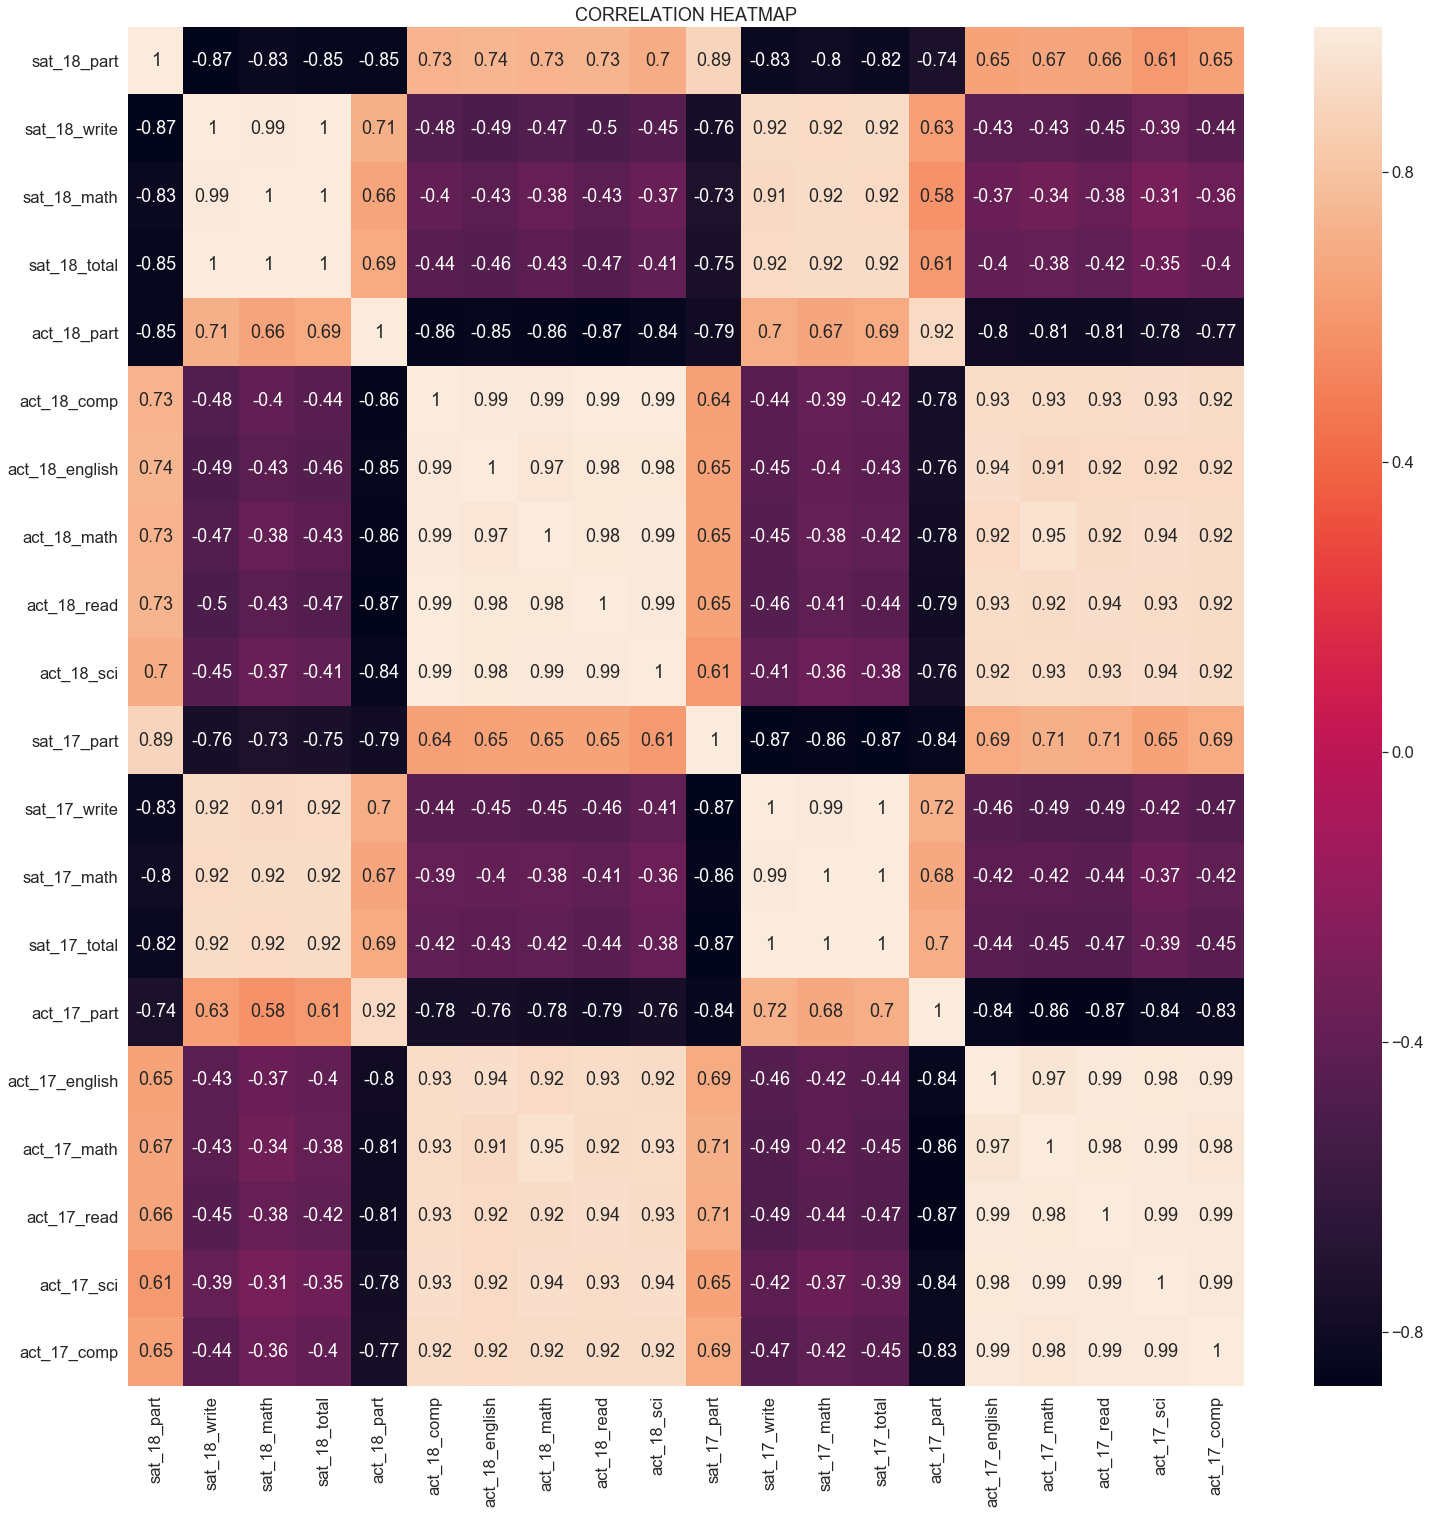

In [140]:


plt.figure(figsize=(25,25))
sns.heatmap(final.corr(), annot=True)

plt.title('CORRELATION HEATMAP')

"""
I'd like to mask the upper triangle in white, but this code didn't work
with sns.axes_style("white"):sns.heatmap(final.corr, mask=mask, vmax=.3, square=True, annot=True)
"""

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [187]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize = (20,10)) # You’ll want to specify your figsize

    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        
        ax[i].hist(dataframe[column], bins=20, ec='black')
        ax[i].title.set_text('Distribution of ' + str(list_of_titles[i]))# feel free to add more settings
        #ax[i].xlabel.set_text('Distribution of ' + str(list_of_xlabels[i]))# Set titles, labels, etc here for each subplot

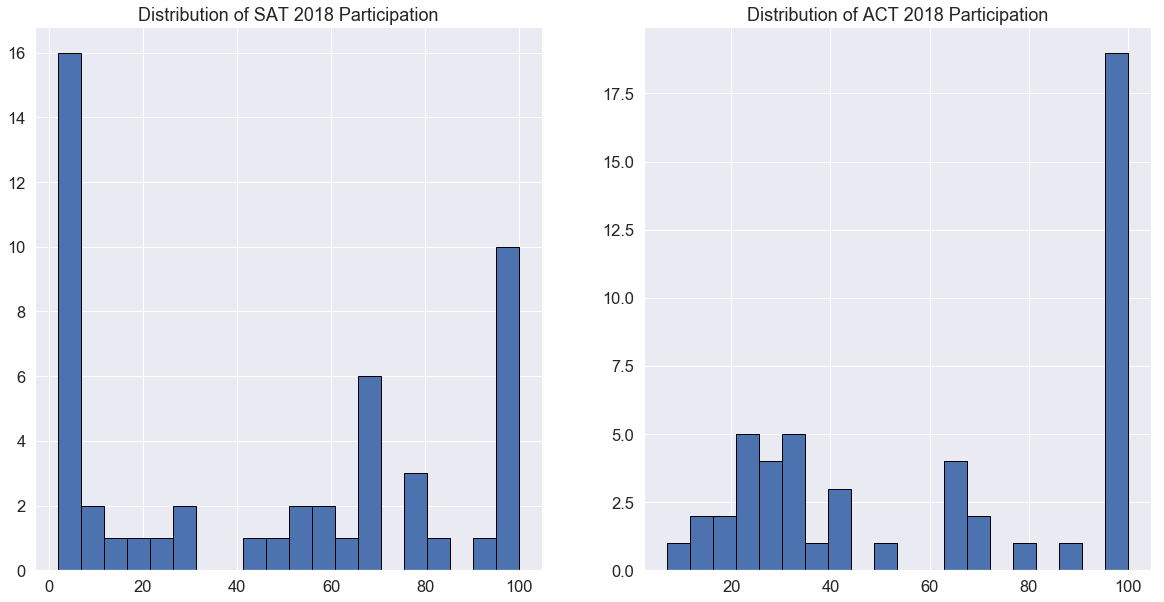

In [188]:
part_columns = ['sat_18_part', "act_18_part"]
part_titles = ['Histogram SAT 2018 Participation', 'Histogram ACT 2018 Participation']
list_of_lables = ['Percent Participation','title']

subplot_histograms(final, part_columns, part_titles, list_of_lables)

"""
COMMENTS: 
    SAT participation is grouped into all/none, with little in-between
    ACT participation shows more of a range in the low participation buckets.
"""

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

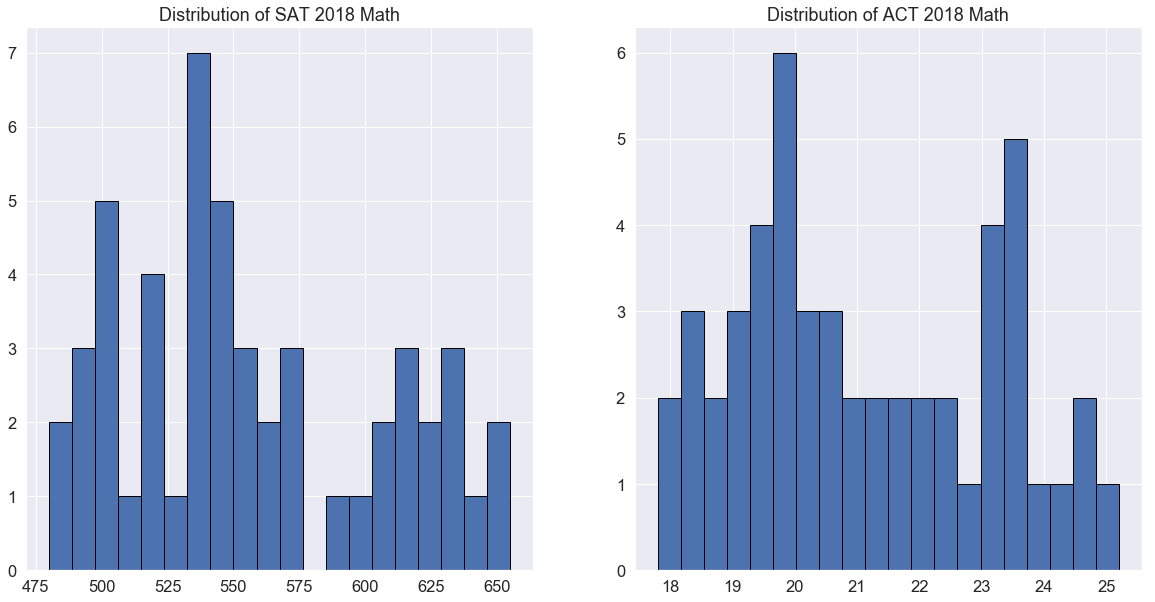

In [189]:
# Math scores SAT vs ACT:

part_columns = ['sat_18_math', "act_18_math"]
part_titles = ['SAT 2018 Math', 'ACT 2018 Math']
list_of_lables = ['Score','title']

subplot_histograms(final, part_columns, part_titles, list_of_lables)

"""
COMMENTS: 
        SAT math scores are reasonably well distributed, with a modest skew right & grouping in the 540 range.
        ACT math score show a similar distribution, but also include an additional high-grouping around 23.5.
"""

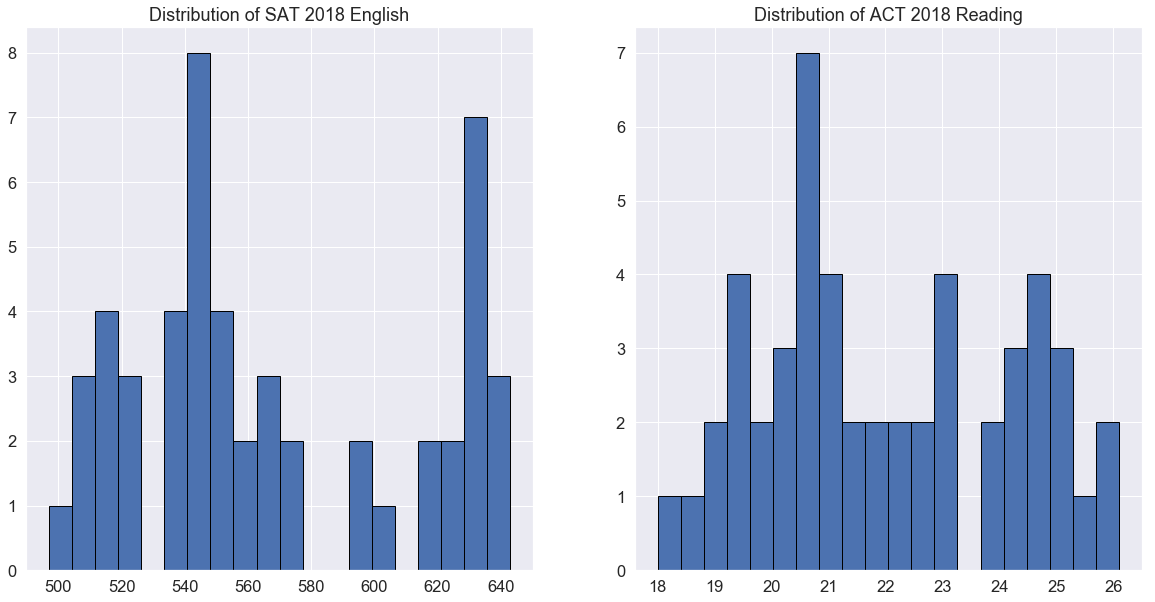

In [191]:
# English vs Reading scores SAT vs ACT:

part_columns = ['sat_18_write', "act_18_read"]
part_titles = ['SAT 2018 English', 'ACT 2018 Reading']
list_of_lables = ['Score','title']

subplot_histograms(final, part_columns, part_titles, list_of_lables)

"""
COMMENTS: 
         SAT english scores are skewed right & include an additional high-grouping in the 630 range.
         ACT reading score show a similar skew without the additional high-grouping.
"""

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


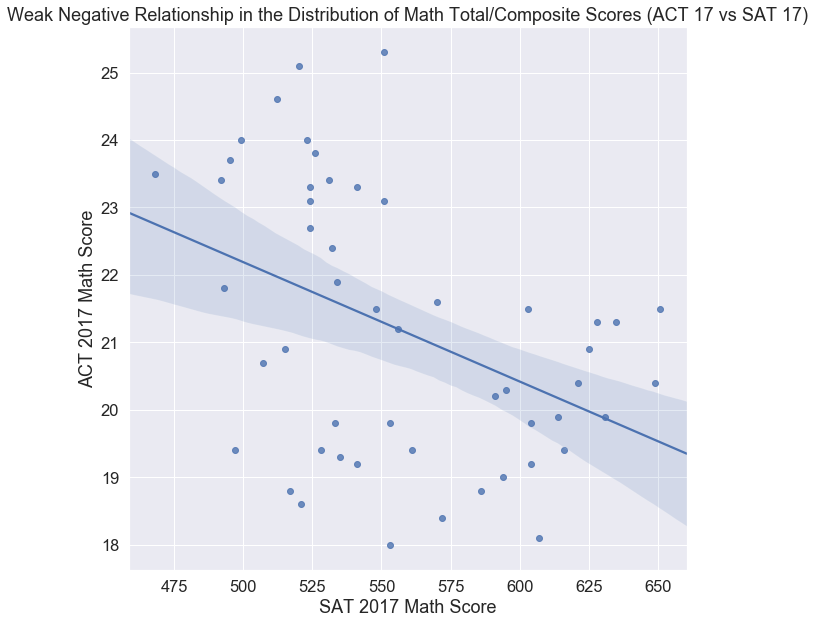

In [253]:
plt.figure(figsize=(10,10))
#sns.regplot(x=xval,y=yval).set_title(title)
sns.regplot(x=final["sat_17_math"], y=final["act_17_math"])
plt.xlabel('SAT 2017 Math Score')
plt.ylabel('ACT 2017 Math Score')
plt.title('Weak Negative Relationship in the Distribution of Math Total/Composite Scores (ACT 17 vs SAT 17)')
#plt.show()

plt.show()


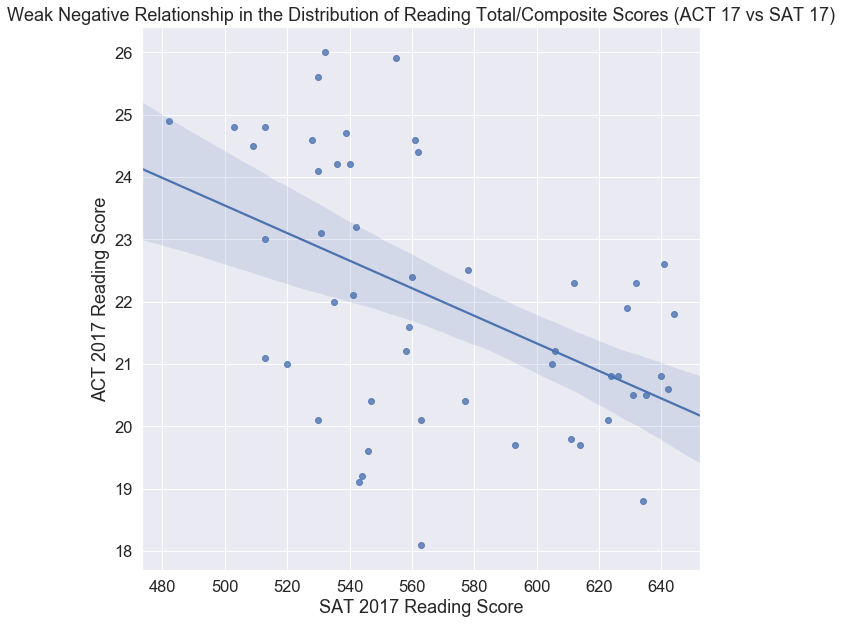

In [252]:
plt.figure(figsize=(10,10))
#sns.regplot(x=xval,y=yval).set_title(title)
sns.regplot(x=final["sat_17_write"], y=final["act_17_read"])
plt.xlabel('SAT 2017 Reading Score')
plt.ylabel('ACT 2017 Reading Score')
plt.title('Weak Negative Relationship in the Distribution of Reading Total/Composite Scores (ACT 17 vs SAT 17)')
#plt.show()

plt.show()


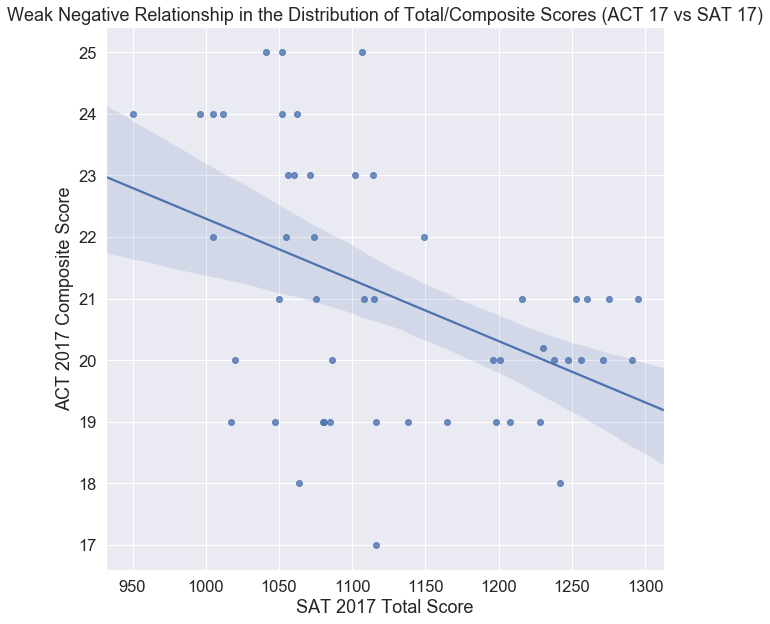

In [250]:
plt.figure(figsize=(10,10))
#sns.regplot(x=xval,y=yval).set_title(title)
sns.regplot(x=final["sat_17_total"], y=final["act_17_comp"])
plt.xlabel('SAT 2017 Total Score')
plt.ylabel('ACT 2017 Composite Score')
plt.title('Weak Negative Relationship in the Distribution of Total/Composite Scores (ACT 17 vs SAT 17)')
#plt.show()

plt.show()


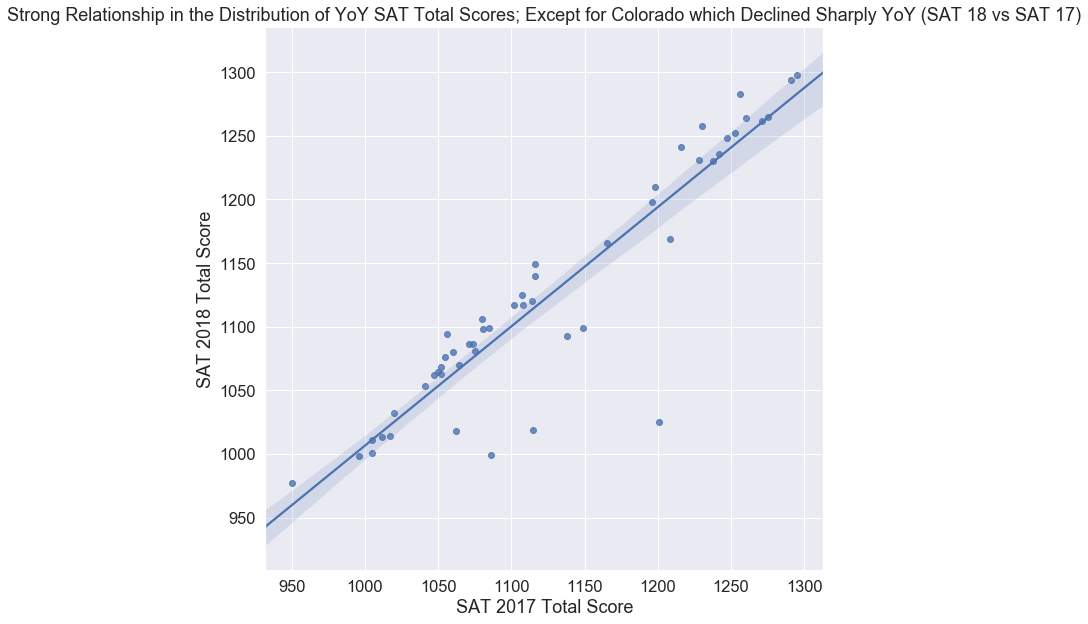

In [249]:
plt.figure(figsize=(10,10))
#sns.regplot(x=xval,y=yval).set_title(title)
sns.regplot(x=final["sat_17_total"], y=final["sat_18_total"])
plt.xlabel('SAT 2017 Total Score')
plt.ylabel('SAT 2018 Total Score')
plt.title('Strong Relationship in the Distribution of YoY SAT Total Scores; Except for Colorado which Declined Sharply YoY (SAT 18 vs SAT 17)')
#plt.show()

plt.show()

In [270]:
final[['state','sat_17_total', 'sat_18_total']].sort_values(by='sat_18_total', ascending = True ).head(10)

"""
This screen shows us the key test score data for Colarado, which is a state of interest
due to their significant increase in SAT participation in 2018.
We believe this this increased participation is the primary reason for the decline in test scores
"""

,state,sat_17_total,sat_18_total
8,District of Columbia,950,977.0
7,Delaware,996,998.0
48,West Virginia,1086,999.0
12,Idaho,1005,1001.0
22,Michigan,1005,1011.0
19,Maine,1012,1013.0
9,Florida,1017,1014.0
39,Rhode Island,1062,1018.0
13,Illinois,1115,1019.0
5,Colorado,1201,1025.0


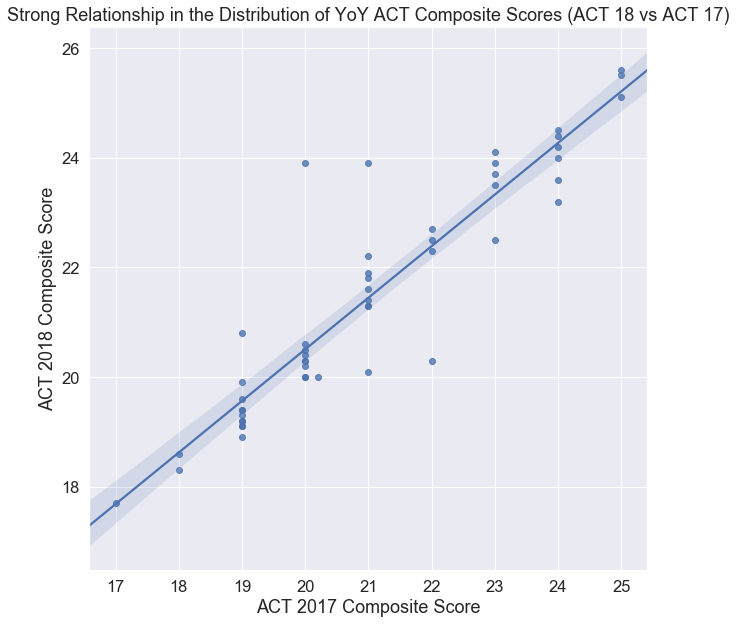

In [248]:
plt.figure(figsize=(10,10))
#sns.regplot(x=xval,y=yval).set_title(title)
sns.regplot(x=final["act_17_comp"], y=final["act_18_comp"])
plt.xlabel('ACT 2017 Composite Score')
plt.ylabel('ACT 2018 Composite Score')
plt.title('Strong Relationship in the Distribution of YoY ACT Composite Scores (ACT 18 vs ACT 17)')

#plt.show()

plt.show()


## Comparisons of Interest:

These are also used extensively in our writeup on data comparability and bias below.

In [294]:
sat_change = final[['state','sat_17_part', 'sat_18_part']]
sat_change['sat18v17'] = sat_change['sat_18_part'] - sat_change['sat_17_part']
sat_change.sort_values(by='sat18v17', ascending = False ).head(10)

"""
The YoY increase in SAT participation (see boxplot below), was driven by increases in:
Illinois
Colorado
Rhode Island
Florida
West Verginia
"""

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,state,sat_17_part,sat_18_part,sat18v17
13,Illinois,9.0,99.0,90.0
5,Colorado,11.0,100.0,89.0
39,Rhode Island,71.0,97.0,26.0
9,Florida,83.0,97.0,14.0
48,West Virginia,14.0,28.0,14.0
32,New York,67.0,79.0,12.0
30,New Jersey,70.0,82.0,12.0
10,Georgia,61.0,70.0,9.0
4,California,53.0,60.0,7.0
20,Maryland,69.0,76.0,7.0


In [301]:

sat_test_change = final[['state','sat_17_total', 'sat_18_total']]
sat_test_change['sat18v17_total'] = sat_test_change['sat_18_total'] - sat_test_change['sat_17_total']
sat_test_change.sort_values(by='sat18v17_total', ascending = True ).head(10)

"""
Colorado & Illinois showed the biggest YoY decrease in SAT test scores, where the increased
participation in 2018 vs 2017 (above) also brought a larger population with a lower average aptitude.
This resulted is these states suffering the sharpest YoY drops in average test scores.
"""

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,state,sat_17_total,sat_18_total,sat18v17_total
5,Colorado,1201,1025.0,-176.0
13,Illinois,1115,1019.0,-96.0
48,West Virginia,1086,999.0,-87.0
35,Ohio,1149,1099.0,-50.0
31,New Mexico,1138,1093.0,-45.0
39,Rhode Island,1062,1018.0,-44.0
3,Arkansas,1208,1169.0,-39.0
15,Iowa,1275,1265.0,-10.0
25,Missouri,1271,1262.0,-9.0
44,Utah,1238,1230.0,-8.0


In [303]:

act_test_change = final[['state','act_17_comp', 'act_18_comp']]
act_test_change['act18v17_comp'] = act_test_change['act_18_comp'] - act_test_change['act_17_comp']
act_test_change.sort_values(by='act18v17_comp', ascending = False ).head(10)

"""
Colorado & Illinois showed the biggest YoY increases in ACT test scores, where the decreased participation 
in 2018 vs 2017 (above) narrowed the population of test takers to a group with higher average aptitude.
This resulted is these states gained the most in YoY average test scores.
"""

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,state,act_17_comp,act_18_comp,act18v17_comp
5,Colorado,20.0,23.9,3.9
13,Illinois,21.0,23.9,2.9
1,Alaska,19.0,20.8,1.8
47,Washington,21.0,22.2,1.2
45,Vermont,23.0,24.1,1.1
9,Florida,19.0,19.9,0.9
41,South Dakota,21.0,21.9,0.9
46,Virginia,23.0,23.9,0.9
15,Iowa,21.0,21.8,0.8
4,California,22.0,22.7,0.7


#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

Text(0.5, 1.0, 'Increased SAT Participation in 2018 Thanks to Illinois & Colorado Conversions')

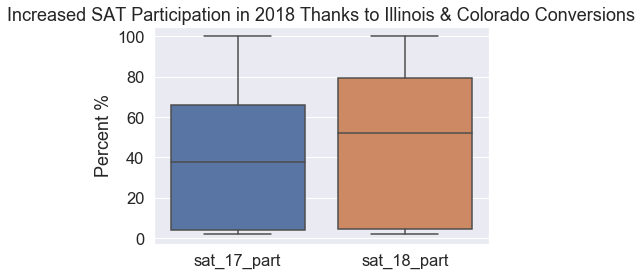

In [310]:
#sns.boxplot(data = final[["sat_17_part","sat_18_part"]],data = final[["sat_17_part","sat_18_part"]])

sns.boxplot(data = final[["sat_17_part","sat_18_part"]])
#sns.boxplot(data = final.sat_17_part)
#plt.xlabel('ACT 2017 Composite Score')
plt.ylabel('Percent %')
plt.title('Increased SAT Participation in 2018 Thanks to Illinois & Colorado Conversions')


# ADDITIONAL COMMENTS:
# LEFT IS 25TH PECENTILE' RIGHT IS 75TH PERCENTILE

#ax = sns.boxplot(x="day", y="total_bill", data=tips)



Text(0.5, 1.0, 'Illinois & Colorado Saw Big Jumps in SAT Participation in 2018 vs 2017...')

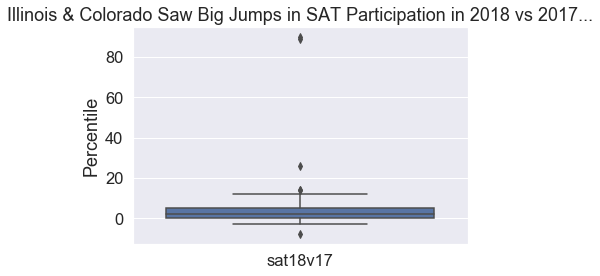

In [305]:
sns.boxplot(data = sat_change[["sat18v17"]])
#sns.boxplot(data = final.sat_17_part)
#plt.xlabel('ACT 2017 Composite Score')
plt.ylabel('Percentile')
plt.title('Illinois & Colorado Saw Big Jumps in SAT Participation in 2018 vs 2017...')

Text(0.5, 1.0, '...and Illinois & Colorado also saw Big Drops in SAT Total Scores in 2018 vs 2017')

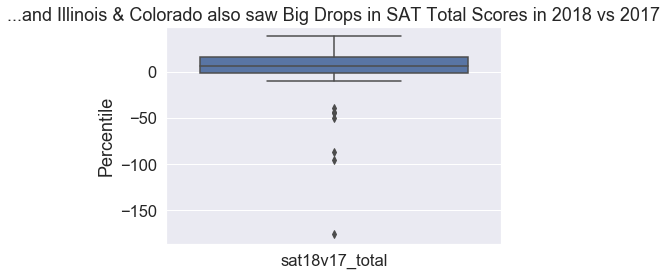

In [307]:
sns.boxplot(data = sat_test_change[["sat18v17_total"]])
#sns.boxplot(data = final.sat_17_part)
#plt.xlabel('ACT 2017 Composite Score')
plt.ylabel('Percentile')
plt.title('...and Illinois & Colorado also saw Big Drops in SAT Total Scores in 2018 vs 2017')

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

## Answer: 

No. We are actually observing stratified samples (results by State) from the total population. As such, significant state-by-state biases remain in the comparability of the data.  




## Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.


## Answer:  

Yes, the same bias exist throughout the data series.   

For example, the year-on-year scores are not comparable for states like Illinois and Colorado due to sharp jumps in participation rates which brought a larger population of lower average aptitude into the state sample.


#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

## Answer: 

We can't gain an understanding of the drivers behind the relationship between SAT and ACT participation rates in 2017 from the data.  

For example, the state-by-state participation rates are not comparable across our sample due to individual state regulations and requirements which are not highlighted by the data and significantly bias not just the participation rates but also the comparability of the test scores.


##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

## Answer: 

No, the data comparison illustrates not only a weak relationship between the SAT and ACT scoring (across  Math; English and Total/Composite scoring), but also shows a negative correlation.  

The negative correlation is not as expected and suggests that strong state-vs-state bias exist in the data making the comparability unreliable for developing meaningful conclusions and forecasts. 

For example, comparing the 2018 and 2017 SAT scores in Illinois and Colorado shows the biggest YoY declines in test results across Math as well as the Total/Composite.  Based on just this data, we may incorrectly conclude that these states testing populations both suffered from a remarkable fall in aptitude.  

Further, when compare those states ACT scores during that period we see the exact opposite, with a significant improvement in test results.  How could it be that the same states which showed a remarkable drop in performance on the SAT test also showed an impressive jump in ACT scores?  Clearly, the data is biased.

However, only when combining other factors like the significant jump in SAT participation rates (and declines in ACT participation) can we begin to develop our hypothesis that the size and aptitude of the participants can we begin to develop a view on how to carefully use and compare this data.  


#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

# SAT Test Participation by State Illustrates a Signficant Regional Bias

#### Across the country, less than 50% of high school graduates take the SAT test, but that percentage varied enormously by state. 

#### Generally speaking, students in the Northeast were more likely to take the test, whilst students in the Midwest/Plains area were least likely to take the test.  However, students in the Midwest/Plains area often have higher scores.  

#### But my experience is that schools on the coasts prefer or require SAT scores, whilst almost every school in the Midwest highly recommend or require ACT scores. 

#### As such, its my hypothesis that Midwest students only take the SAT if they want to apply to schools outside the Midwest, resulting in a smaller but more talented student participation population taking the test in those states than exist in the coasts. 

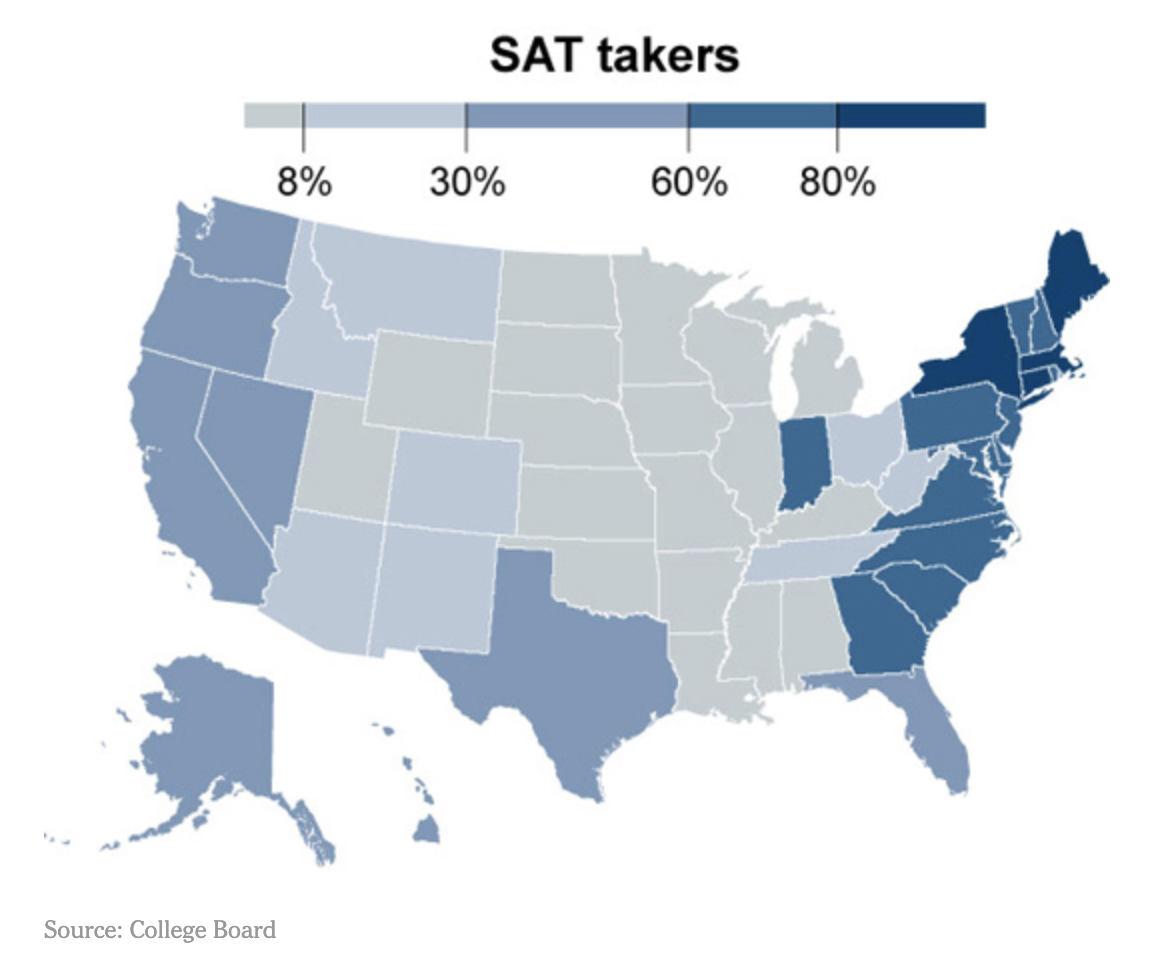

In [294]:
sat_change = final[['state','sat_17_part', 'sat_18_part']]
sat_change['sat18v17'] = sat_change['sat_18_part'] - sat_change['sat_17_part']
sat_change.sort_values(by='sat18v17', ascending = False ).head(10)

"""
COMMENTS:
We can see the YoY increase in SAT participation (see boxplot below), was driven by increases in:
Illinois
Colorado
Rhode Island
Florida
West Verginia
"""

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,state,sat_17_part,sat_18_part,sat18v17
13,Illinois,9.0,99.0,90.0
5,Colorado,11.0,100.0,89.0
39,Rhode Island,71.0,97.0,26.0
9,Florida,83.0,97.0,14.0
48,West Virginia,14.0,28.0,14.0
32,New York,67.0,79.0,12.0
30,New Jersey,70.0,82.0,12.0
10,Georgia,61.0,70.0,9.0
4,California,53.0,60.0,7.0
20,Maryland,69.0,76.0,7.0


In [301]:

sat_test_change = final[['state','sat_17_total', 'sat_18_total']]
sat_test_change['sat18v17_total'] = sat_test_change['sat_18_total'] - sat_test_change['sat_17_total']
sat_test_change.sort_values(by='sat18v17_total', ascending = True ).head(10)

"""
COMMENTS:
Colorado & Illinois SAW the BIGGEST YoY decrease in SAT test scores, where the increased
participation in 2018 vs 2017 (above) also brought a larger population with a lower average aptitude.
This resulted is these states suffering the sharpest YoY drops in average test scores.
"""

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,state,sat_17_total,sat_18_total,sat18v17_total
5,Colorado,1201,1025.0,-176.0
13,Illinois,1115,1019.0,-96.0
48,West Virginia,1086,999.0,-87.0
35,Ohio,1149,1099.0,-50.0
31,New Mexico,1138,1093.0,-45.0
39,Rhode Island,1062,1018.0,-44.0
3,Arkansas,1208,1169.0,-39.0
15,Iowa,1275,1265.0,-10.0
25,Missouri,1271,1262.0,-9.0
44,Utah,1238,1230.0,-8.0


In [303]:

act_test_change = final[['state','act_17_comp', 'act_18_comp']]
act_test_change['act18v17_comp'] = act_test_change['act_18_comp'] - act_test_change['act_17_comp']
act_test_change.sort_values(by='act18v17_comp', ascending = False ).head(10)

"""
COMMENTS:
Colorado & Illinois saw the biggest YoY increases in ACT test scores, where the decreased participation in 2018 
vs 2017 (above) narrowed the population of test takers to a group with higher average aptitude.
This resulted is these states gained the most in YoY average test scores.
"""

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,state,act_17_comp,act_18_comp,act18v17_comp
5,Colorado,20.0,23.9,3.9
13,Illinois,21.0,23.9,2.9
1,Alaska,19.0,20.8,1.8
47,Washington,21.0,22.2,1.2
45,Vermont,23.0,24.1,1.1
9,Florida,19.0,19.9,0.9
41,South Dakota,21.0,21.9,0.9
46,Virginia,23.0,23.9,0.9
15,Iowa,21.0,21.8,0.8
4,California,22.0,22.7,0.7


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

### Key Conclusion:  
The College Board says on their web site that "We’re a mission-driven not-for-profit organization that connects students to college success".  If that's the case then we need to have the data which shows the strong connection of SAT testing to college admissions on as granular a level as possible (individual level of the total population).

As such, we need to ask ourselves why we are reviewing this data set and is it the right data set to be analyzing?  If it is for recommendations on how to boost the SATs participation rates, as the question above suggests, then I believe we are not analyzing the best data-sets needed to develop deep insights and recommendations. 

In fact, my conclusion is that we should be very cautious about making sweeping conclusions and recommendations from this data set due to a strong stratification bias, with data presented on a state-by-state basis. Simply, New York state may not be comparable to Iowa and the way the questions are asked above may lead a reseacher to some very incorrect conclusions.  For example, the average test scores of the SAT versus ACT shows a surprising negative correlation, which seems odd.  We need to recognize that the numbers as presented are not comparable across our state-by-state data set due to differing participation rates and other imbedded selection biases in each states student population.

Simply, I believe the sample data-set we are analyzing may only be relevant for high-level analysis of state trends, but has serious limitations to be effective in allowing the College Board to sell its Mission Statement. 

    
### Key Recommendation: 
As such, our key recommendation is to request more data to allow for unbiased sampling and equally importantly, we would request for the college placement statistics to show the linkage of SAT testing and college admissions to allow for more robust performance testing and recommendations.  


### Suggestion to the College Board of West Virginia:  
Perhaps West Virginia is a more interesting example of an Eastern state with potential to have a significantly higher SAT participation rate.  After getting additional data on college placements (see request for more data), I believe a stronger argument could be made by linking higher SAT participation in its neighbouring East Coast states to higher college placements as well.  Additionally, if we had even more detailed data linking the SAT score with the college/university ranking we may be also be able to support an argument that SAT participation and scoring can better connect students to the best colleges and universities.    


### Request for More Data:  
We would request the entire detailed Nation-wide data-set, to allow unbiased random samplings which should provide for improved insights and recommendations.  Additionally, we would request data on college admissions in as much detail as possible.  Plus any further breakdown of the SAT test taker such as data on: parents education level; ethnicity; family income; and number of times taking the test.  We would also request this data for the ACT.


